## Reading Subject ID data

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os

Data visualisation for single day

In [3]:
# Load the data from subjectID1.csv
data = pd.read_csv("Physio_data\subjectID_1.csv")

# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d.%m.%y %H:%M')

# Set the window size to one day
window_size = pd.Timedelta(days=1)

# Iterate through each day
for day, day_data in data.groupby(data['Timestamp'].dt.date):
    print(f"Window for {day}:")
    print(day_data)
    print()  # Add an empty line for readability
    

Window for 2019-03-14:
              Timestamp  ActivityCounts  Barometer  BloodPerfusion  \
0   2019-03-14 14:38:00        0.784314     981.25           0.000   
1   2019-03-14 14:39:00        1.176471     981.20           0.175   
2   2019-03-14 14:40:00        2.352941     981.20           0.190   
3   2019-03-14 14:41:00        1.176471     981.10           0.110   
4   2019-03-14 14:42:00        1.176471     981.20           0.100   
..                  ...             ...        ...             ...   
557 2019-03-14 23:55:00        0.784314     984.40           0.890   
558 2019-03-14 23:56:00        0.784314     984.40           0.880   
559 2019-03-14 23:57:00        0.784314     984.40           0.920   
560 2019-03-14 23:58:00        0.784314     984.40           0.835   
561 2019-03-14 23:59:00        0.784314     984.40           0.895   

     BloodPulseWave  EnergyExpenditure  GalvanicSkinResponse         HR  \
0              0.00         753.636566                   NaN 

In [4]:
data

,Timestamp,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,GalvanicSkinResponse,HR,HRV,RESP,Steps,SkinTemperature
0,2019-03-14 14:38:00,0.784314,981.25,0.000,0.00,753.636566,NaN,83.000000,NaN,NaN,0.0,28.280
1,2019-03-14 14:39:00,1.176471,981.20,0.175,1.90,1256.060944,NaN,75.403633,NaN,NaN,0.0,29.440
2,2019-03-14 14:40:00,2.352941,981.20,0.190,1.82,1256.060944,NaN,69.112653,NaN,14.562500,0.0,30.410
3,2019-03-14 14:41:00,1.176471,981.10,0.110,1.94,1256.060944,NaN,69.781164,NaN,12.175528,0.0,31.000
4,2019-03-14 14:42:00,1.176471,981.20,0.100,1.68,1256.060944,NaN,72.306609,NaN,12.531234,0.0,31.455
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,2019-03-21 12:59:00,14.117647,1001.45,0.810,2.02,1311.853180,4.020472,73.271756,NaN,19.627842,0.0,35.030
9982,2019-03-21 13:00:00,3.137255,1001.50,0.860,2.87,1311.853180,4.009111,74.519710,65.000000,14.063161,0.0,35.030
9983,2019-03-21 13:01:00,6.666667,1001.40,0.790,2.07,1311.853180,3.996228,75.051758,62.000000,11.875270,17.0,35.060
9984,2019-03-21 13:02:00,0.784314,1001.40,0.795,2.95,1311.853180,3.979228,73.092284,62.480000,16.038811,4.0,35.090


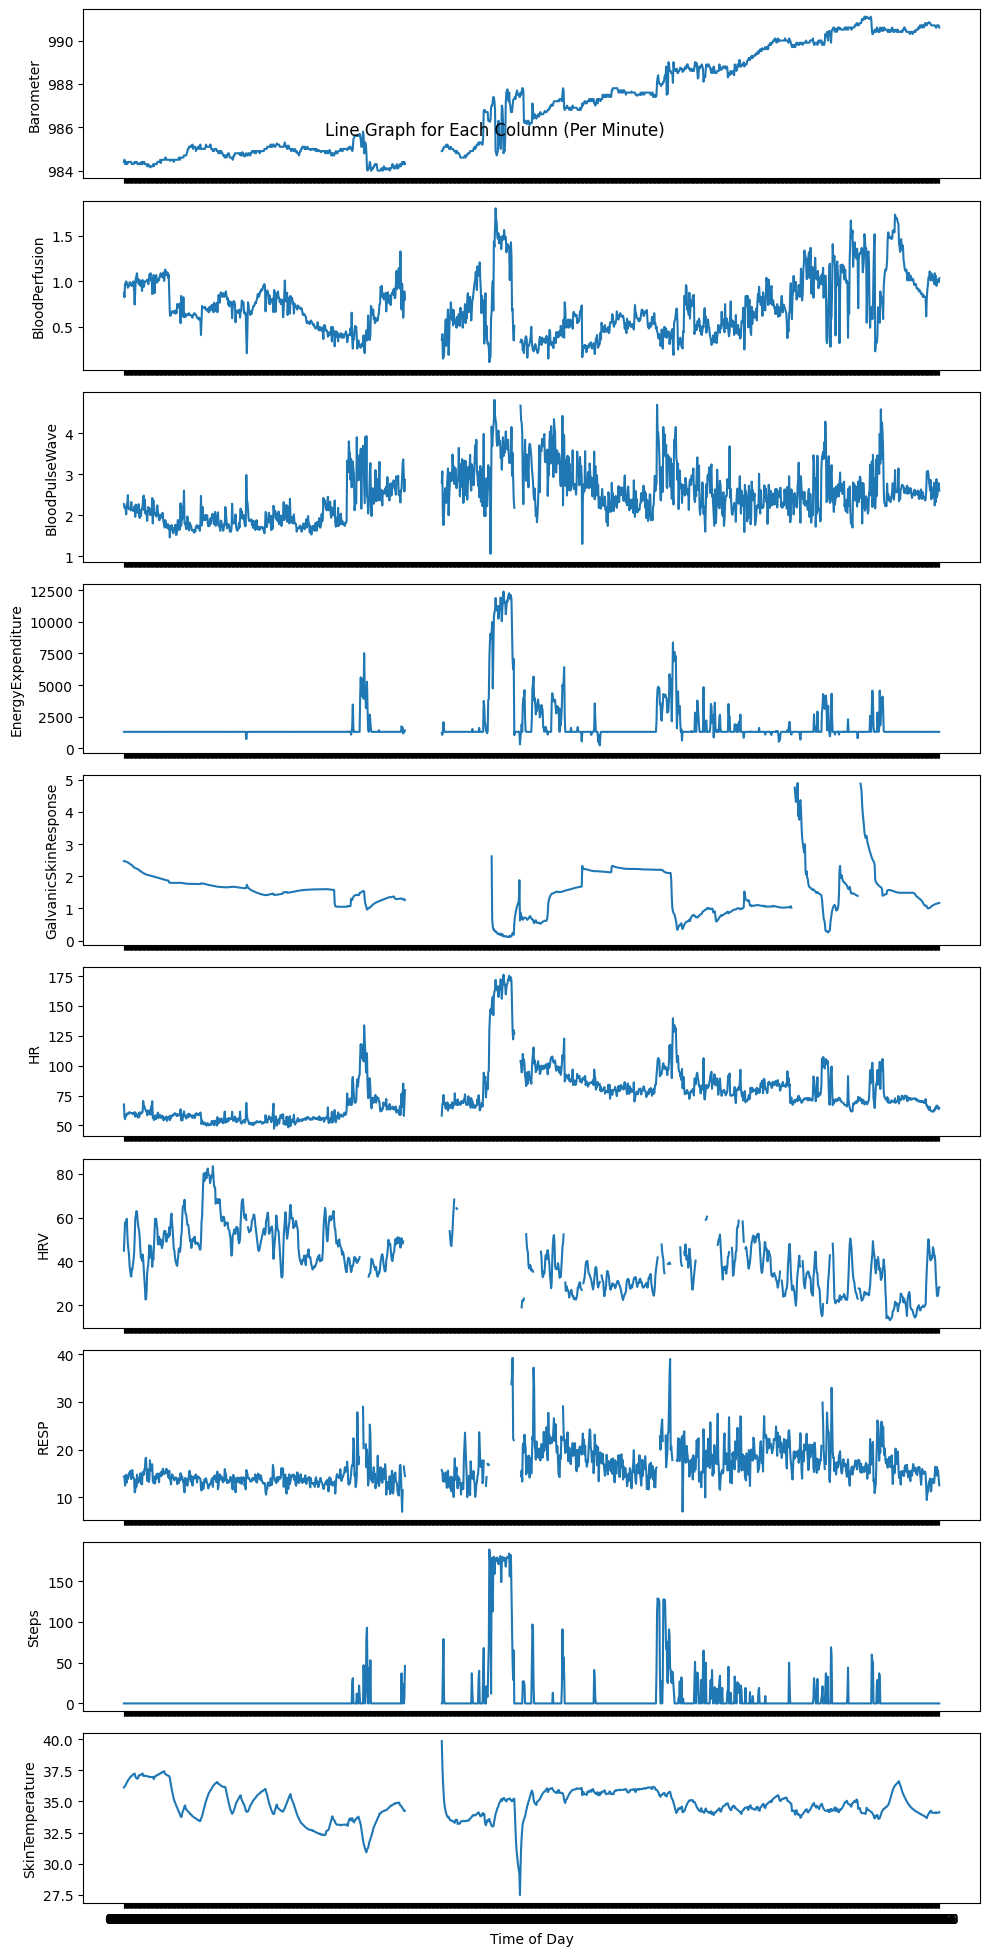

In [5]:
# Define the columns to plot
columns_to_plot = ['Barometer', 'BloodPerfusion', 'BloodPulseWave',
                   'EnergyExpenditure', 'GalvanicSkinResponse', 'HR', 'HRV', 'RESP', 'Steps', 'SkinTemperature']
# Load the data from subjectID1.csv
data = pd.read_csv("Physio_data\subjectID_1.csv")

# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d.%m.%y %H:%M')

# Set the Timestamp column as the index
data.set_index('Timestamp', inplace=True)

# Filter the data for a particular day
desired_date = pd.to_datetime('2019-03-15')  # Change the desired date
daily_data = data[data.index.date == desired_date.date()]

# Define the subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20), sharex=True)

# Plot a line graph for each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    axs[i].plot(daily_data.index.strftime('%H:%M'), daily_data[column])
    axs[i].set_ylabel(column)

# Customize the plot
plt.xlabel('Time of Day')
plt.suptitle('Line Graph for Each Column (Per Minute)', y=0.92)
plt.tight_layout()

# Display the plot
plt.show()

Missing Values Handling

In [6]:
print("Rows : ",data.shape[0])
print("columns :",data.shape[1])
print("\nFeatures : \n",data.columns.tolist())
print("\nMissing Values : ",data.isnull().any())
print("\nUnique values : \n",data.nunique())

Rows :  9986
columns : 11

Features : 
 ['ActivityCounts', 'Barometer', 'BloodPerfusion', 'BloodPulseWave', 'EnergyExpenditure', 'GalvanicSkinResponse', 'HR', 'HRV', 'RESP', 'Steps', 'SkinTemperature']

Missing Values :  ActivityCounts          True
Barometer               True
BloodPerfusion          True
BloodPulseWave          True
EnergyExpenditure       True
GalvanicSkinResponse    True
HR                      True
HRV                     True
RESP                    True
Steps                   True
SkinTemperature         True
dtype: bool

Unique values : 
 ActivityCounts           132
Barometer                607
BloodPerfusion           402
BloodPulseWave           348
EnergyExpenditure       1548
GalvanicSkinResponse    7275
HR                      9298
HRV                     3948
RESP                    8427
Steps                    158
SkinTemperature          434
dtype: int64


## filling NULL values by rolling method

In [7]:
data.isnull().sum()

ActivityCounts           599
Barometer                599
BloodPerfusion           642
BloodPulseWave           642
EnergyExpenditure        599
GalvanicSkinResponse    2660
HR                       642
HRV                     2127
RESP                    1028
Steps                    599
SkinTemperature          599
dtype: int64

In [8]:
# gives all the rows where HR is NULL
data.query('HR!=HR')

,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,GalvanicSkinResponse,HR,HRV,RESP,Steps,SkinTemperature
Timestamp,,,,,,,,,,,
2019-03-14 14:44:00,0.784314,981.2,NaN,NaN,1172.323547,NaN,NaN,NaN,NaN,0.0,32.220
2019-03-14 14:45:00,8.235294,981.1,NaN,NaN,230.277840,NaN,NaN,NaN,NaN,0.0,31.940
2019-03-14 14:46:00,0.784314,981.2,NaN,NaN,1256.060944,NaN,NaN,NaN,NaN,0.0,30.015
2019-03-14 14:47:00,0.784314,981.1,NaN,NaN,1172.323547,NaN,NaN,NaN,NaN,0.0,29.560
2019-03-14 14:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-20 15:42:00,1.176471,1002.3,NaN,NaN,721.519249,NaN,NaN,NaN,NaN,23.0,27.940
2019-03-20 15:43:00,9.019608,1002.3,NaN,NaN,743.383469,NaN,NaN,NaN,NaN,18.0,29.205
2019-03-20 15:45:00,1.568627,1002.2,NaN,NaN,1311.853180,NaN,NaN,NaN,NaN,43.0,31.060


In [9]:
data.query('HR!=HR').count()

ActivityCounts          43
Barometer               43
BloodPerfusion           0
BloodPulseWave           0
EnergyExpenditure       43
GalvanicSkinResponse    19
HR                       0
HRV                      0
RESP                     0
Steps                   43
SkinTemperature         43
dtype: int64

now checking for nulll values of RESP

In [10]:
data[data['RESP'].isnull()]

,ActivityCounts,Barometer,BloodPerfusion,BloodPulseWave,EnergyExpenditure,GalvanicSkinResponse,HR,HRV,RESP,Steps,SkinTemperature
Timestamp,,,,,,,,,,,
2019-03-14 14:38:00,0.784314,981.25,0.000,0.00,753.636566,NaN,83.000000,NaN,NaN,0.0,28.280
2019-03-14 14:39:00,1.176471,981.20,0.175,1.90,1256.060944,NaN,75.403633,NaN,NaN,0.0,29.440
2019-03-14 14:44:00,0.784314,981.20,NaN,NaN,1172.323547,NaN,NaN,NaN,NaN,0.0,32.220
2019-03-14 14:45:00,8.235294,981.10,NaN,NaN,230.277840,NaN,NaN,NaN,NaN,0.0,31.940
2019-03-14 14:46:00,0.784314,981.20,NaN,NaN,1256.060944,NaN,NaN,NaN,NaN,0.0,30.015
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-21 11:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-21 11:36:00,6.666667,1001.90,0.130,2.84,590.333931,NaN,65.850067,NaN,NaN,0.0,33.720
2019-03-21 11:37:00,5.882353,1001.95,0.230,1.89,1907.294437,NaN,81.754554,NaN,NaN,50.0,33.780


visualising the data

In [2]:
import plotly.express as px

In [12]:
fig = px.line(data , y = 'HR',title = 'Heart Rate')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [13]:
data_na = data.copy()
data_na = data_na.dropna()

## NULL VALUES PROCESSING FOR ALL FILES

In [1]:
import os
import glob
import pandas as pd

In [2]:
# Create a new folder for storing the updated files
folder_path = "data_no_null"
os.makedirs(folder_path, exist_ok=True)

# Get the list of file paths for subjectID files
file_paths = glob.glob("Physio_data\subjectID_*.csv")

# Define the sliding window size
window_size = 10


# Iterate over the file paths
for file_path in file_paths:
    # Load the data from the file
    data = pd.read_csv(file_path)
    
    # Create a new file name for saving the updated data
    file_name = os.path.basename(file_path)
    subject_id = file_name.split("_")[1].split(".")[0]
    new_file_name = f"subjectID_{subject_id}_no_null.csv"
    new_file_path = os.path.join(folder_path, new_file_name)
    
    # Fill missing values using sliding window approach
    data_filled = data.copy()
    
    for column in data.columns:
        missing_indices = data_filled[column].isnull()
        for i in range(window_size, len(data_filled)):
            if missing_indices[i]:
                window = data_filled[column][i-window_size:i]
                window_mean = window.mean()
                data_filled[column][i] = window_mean
    
    # Save the updated data to a new file
    data_filled.to_csv(new_file_path, index=False)
    
    print("\nUpdated data saved to:", new_file_path)
    print("\n") 
        

C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_1_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_10_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_11_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_12_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_13_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_14_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_15_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_16_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_17_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_18_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_19_no_null.csv



Updated data saved to: data_no_null\subjectID_2_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean
C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_20_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_21_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_22_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_23_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_24_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_25_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_26_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_27_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_28_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_3_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_4_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_5_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_6_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_7_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_8_no_null.csv




C:\Users\Harsh Bisla\AppData\Local\Temp\ipykernel_8216\3256609925.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filled[column][i] = window_mean



Updated data saved to: data_no_null\subjectID_9_no_null.csv




In [3]:
# Load the data from subjectID1.csv
data = pd.read_csv("data_no_null/subjectID_1_no_null.csv")

In [6]:
fig = px.line(data, y = 'HRV',title = 'Heart Rate Variaton')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

Removing ActivityCounts and ActivityClass column

In [7]:
# Create a new folder for storing the updated files
folder_path = "data_no_null"
os.makedirs(folder_path, exist_ok=True)

# Get the list of file paths for subjectID files
file_paths = glob.glob("data_no_null\subjectID_*_no_null.csv")

# Iterate over the file paths
for file_path in file_paths:
    # Load the data from the file
    data = pd.read_csv(file_path)
    
    # Check if "ActivityClass" column is present and delete it
    if "ActivityClass" in data.columns:
        data.drop("ActivityClass", axis=1, inplace=True)
    
    # Check if "ActivityCounts" column is present and delete it
    if "ActivityCounts" in data.columns:
        data.drop("ActivityCounts", axis=1, inplace=True)
    
    # Create a new file name for saving the updated data
    new_file_name = os.path.basename(file_path)
    new_file_path = os.path.join(folder_path, new_file_name)
    
    # Save the updated data to a new file
    data.to_csv(new_file_path, index=False)
    
    print("\nUpdated data saved to:", new_file_path)
    print("\n")



Updated data saved to: data_no_null\subjectID_10_no_null.csv



Updated data saved to: data_no_null\subjectID_11_no_null.csv



Updated data saved to: data_no_null\subjectID_12_no_null.csv



Updated data saved to: data_no_null\subjectID_13_no_null.csv



Updated data saved to: data_no_null\subjectID_14_no_null.csv



Updated data saved to: data_no_null\subjectID_15_no_null.csv



Updated data saved to: data_no_null\subjectID_16_no_null.csv



Updated data saved to: data_no_null\subjectID_17_no_null.csv



Updated data saved to: data_no_null\subjectID_18_no_null.csv



Updated data saved to: data_no_null\subjectID_19_no_null.csv



Updated data saved to: data_no_null\subjectID_1_no_null.csv



Updated data saved to: data_no_null\subjectID_20_no_null.csv



Updated data saved to: data_no_null\subjectID_21_no_null.csv



Updated data saved to: data_no_null\subjectID_22_no_null.csv



Updated data saved to: data_no_null\subjectID_23_no_null.csv



Updated data saved to: data_no_null\subj

## Directly removing the rows with NULL values

In [3]:
# Folder path where CSV files are located
folder_path = 'physio_data'

# Initialize a dictionary to store the column-wise null counts
column_null_counts = {}

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Iterate through each file in the folder
for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    # Count the null entries in each column and add to the dictionary
    null_counts = df.isnull().sum()
    for column, count in null_counts.items():
        column_null_counts[column] = column_null_counts.get(column, 0) + count

# Print the accumulated null counts for each column
for column, count in column_null_counts.items():
    print(f"Column: {column}, Null Entries: {count}")

Column: Timestamp, Null Entries: 0
Column: ActivityCounts, Null Entries: 734020
Column: Barometer, Null Entries: 740854
Column: BloodPerfusion, Null Entries: 746796
Column: BloodPulseWave, Null Entries: 748090
Column: EnergyExpenditure, Null Entries: 734039
Column: GalvanicSkinResponse, Null Entries: 917816
Column: HR, Null Entries: 746798
Column: HRV, Null Entries: 825848
Column: RESP, Null Entries: 759432
Column: Steps, Null Entries: 734987
Column: SkinTemperature, Null Entries: 732225
Column: ActivityClass, Null Entries: 825077
Column: SkinTemperature.Value, Null Entries: 1810


Create a folder named as updated_data which contains all the csv files from physio_data without the columns ActivityCounts, GalvanicSkinResponse , HRV , ActivityClass

In [4]:
# Function to copy CSV files while excluding columns
def copy_csv_without_columns(source_file, destination_file, excluded_columns):
    df = pd.read_csv(source_file)
    # Check if the excluded columns are present in the DataFrame before dropping
    columns_to_drop = [col for col in excluded_columns if col in df.columns]
    df.drop(columns_to_drop, axis=1, inplace=True)
    df.to_csv(destination_file, index=False)

In [5]:
# Folder path where CSV files are located
source_folder = 'physio_data'

# Folder path where updated CSV files will be saved
destination_folder = 'updated_data'

# List of columns to exclude
excluded_columns = ["ActivityCounts", "GalvanicSkinResponse", "HRV", "ActivityClass"]

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Get a list of all files in the source folder
file_list = os.listdir(source_folder)

# Iterate through each file in the source folder
for file_name in file_list:
    source_file_path = os.path.join(source_folder, file_name)
    destination_file_path = os.path.join(destination_folder, file_name)
    # Copy the CSV file to the destination folder without the excluded columns
    copy_csv_without_columns(source_file_path, destination_file_path, excluded_columns)

print("CSV files copied to 'updated_data' folder without the excluded columns.")

CSV files copied to 'updated_data' folder without the excluded columns.


Iterate through each csv file in updated_data folder and count null values in each row of every csv file and if more than 5 null entries are present in a row remove that row

In [6]:
# Function to remove rows with more than 5 null entries and count the number of removed rows
def remove_rows_with_nulls(csv_file, threshold=4):
    df = pd.read_csv(csv_file)
    # Count null values in each row
    null_counts = df.isnull().sum(axis=1)
    # Filter rows with more than 'threshold' null entries
    removed_rows = df[null_counts > threshold]
    df = df[null_counts <= threshold]
    return df, removed_rows.shape[0]

In [7]:
# Folder path where CSV files are located
source_folder = 'updated_data'

# Create a temporary folder to store modified files
temp_folder = 'updated_data_2'


# Create the temporary folder if it doesn't exist
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

In [8]:

# Get a list of all files in the source folder
file_list = os.listdir(source_folder)

total_removed_rows = 0  # To keep track of the total number of removed rows

# Iterate through each file in the source folder
for file_name in file_list:
    source_file_path = os.path.join(source_folder, file_name)
    temp_file_path = os.path.join(temp_folder, file_name)
    
    # Remove rows with more than 5 null entries and get the number of removed rows
    df, num_removed_rows = remove_rows_with_nulls(source_file_path)
    total_removed_rows += num_removed_rows
    
    df.to_csv(temp_file_path, index=False)

# Remove the source folder and rename the temporary folder to the source folder
# shutil.rmtree(source_folder)
# os.rename(temp_folder, source_folder)

print(f"Null entries removed from CSV files in the 'updated_data' folder.")
print(f"Total number of rows removed: {total_removed_rows}")

Null entries removed from CSV files in the 'updated_data' folder.
Total number of rows removed: 734392


Now Filling leftover NULL values with rolling window technique

In [9]:
import numpy as np

In [10]:
# Function to fill null entries using sliding window and mean value
def fill_null_entries_with_sliding_window(column_data, window_size):
    filled_data = column_data.copy()
    for i in range(len(column_data)):
        start_index = max(0, i - window_size + 1)
        end_index = min(len(column_data), i + 1)
        window_values = column_data[start_index:end_index]
        valid_values = window_values[~np.isnan(window_values)]
        if len(valid_values) > 0:
            filled_data[i] = np.mean(valid_values)
    return filled_data

In [11]:
# Folder paths
input_folder_path = 'updated_data_2'
output_folder_path = 'updated_data_3'

# Sliding window size
window_size = 10

# Get a list of all files in the input folder
file_list = os.listdir(input_folder_path)
# Create the temporary folder if it doesn't exist
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)


In [12]:
# Iterate through each file in the input folder
for file_name in file_list:
    input_file_path = os.path.join(input_folder_path, file_name)
    df = pd.read_csv(input_file_path)
    
    # Iterate through each column (excluding the first column)
    for column in df.columns[1:]:
        column_data = df[column].values
        # Fill null entries using the sliding window and mean value
        filled_data = fill_null_entries_with_sliding_window(column_data, window_size)
        df[column] = filled_data

    # Save the updated DataFrame to the output folder
    output_file_path = os.path.join(output_folder_path, file_name)
    df.to_csv(output_file_path, index=False)

print("Null entries filled using sliding window and updated CSV files saved in the 'updated_data_3' folder.")
        

Null entries filled using sliding window and updated CSV files saved in the 'updated_data_3' folder.


To fill all the remaining NULL entries in the 'updated_data_3' folder with the column mean, you can modify the code as follows:

In [13]:
# Function to fill NULL entries in each column with the column mean
def fill_null_entries_with_column_mean(df):
    for column in df.columns[1:]:
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)

In [14]:
# Folder paths
input_folder_path = 'updated_data_3'

# Get a list of all files in the input folder
file_list = os.listdir(input_folder_path)

# Iterate through each file in the input folder
for file_name in file_list:
    input_file_path = os.path.join(input_folder_path, file_name)
    df = pd.read_csv(input_file_path)
    
    # Fill NULL entries with column mean
    fill_null_entries_with_column_mean(df)

    # Save the updated DataFrame to the same file
    df.to_csv(input_file_path, index=False)

print("All NULL entries filled with column mean in the 'updated_data_3' folder.")

All NULL entries filled with column mean in the 'updated_data_3' folder.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

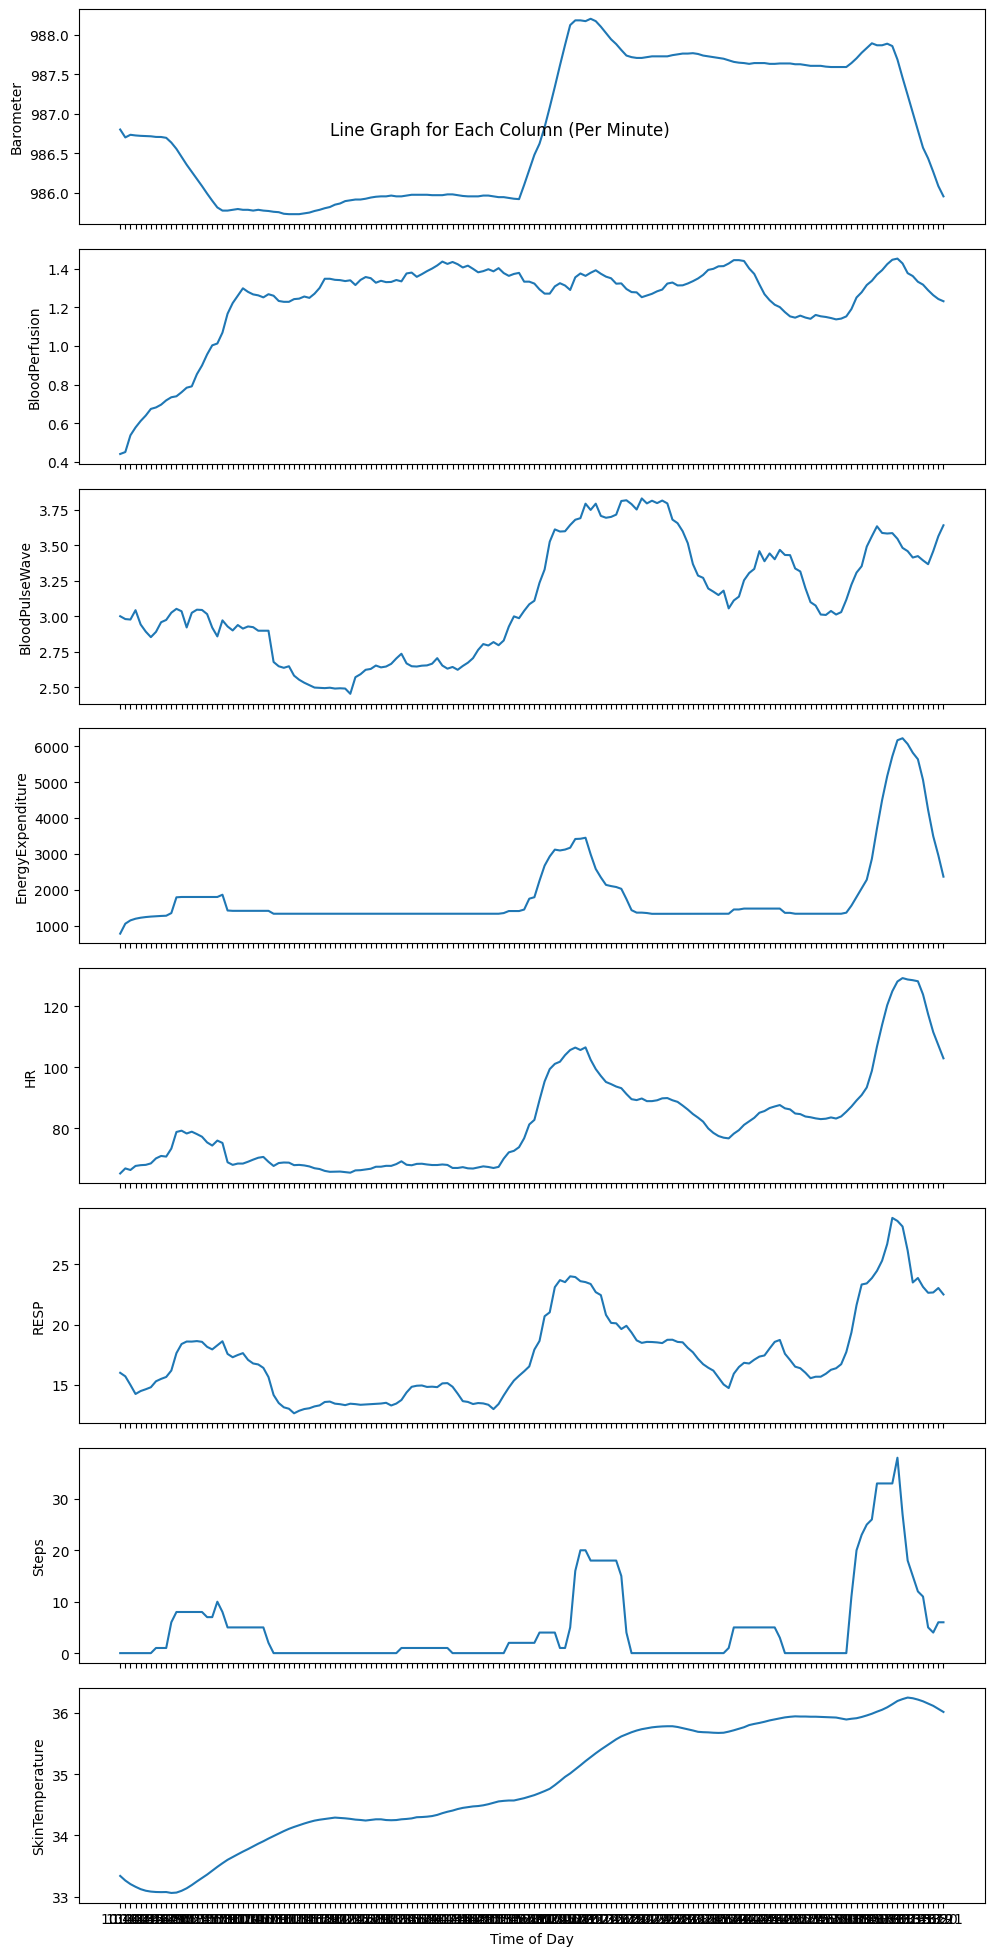

In [17]:
# Define the columns to plot
columns_to_plot = ['Barometer', 'BloodPerfusion', 'BloodPulseWave',
                   'EnergyExpenditure', 'HR', 'RESP', 'Steps', 'SkinTemperature']
# Load the data from subjectID1.csv
data = pd.read_csv("updated_data_3\subjectID_2.csv")

# Convert the Timestamp column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d.%m.%y %H:%M')

# Set the Timestamp column as the index
data.set_index('Timestamp', inplace=True)

# Filter the data for a particular day
desired_date = pd.to_datetime('2019-04-16')  # Change the desired date
daily_data = data[data.index.date == desired_date.date()]

# Define the subplots
fig, axs = plt.subplots(len(columns_to_plot), 1, figsize=(10, 20), sharex=True)

# Plot a line graph for each column in a separate subplot
for i, column in enumerate(columns_to_plot):
    axs[i].plot(daily_data.index.strftime('%H:%M'), daily_data[column])
    axs[i].set_ylabel(column)

# Customize the plot
plt.xlabel('Time of Day')
plt.suptitle('Line Graph for Each Column (Per Minute)', y=0.92)
plt.tight_layout()

# Display the plot
plt.show()